# 핀테크 업체의 대출 고객 기준 마련
---
* dropna조 : 서수아, 서선우, 이주노


### 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 경고 메세지 삭제
import warnings
warnings.filterwarnings('ignore')

### 데이터 로드 및 확인

In [3]:
df = pd.read_csv('./datasets/loan_data.csv')

In [4]:
# 컬럼별 데이터 타입 확인(purpose 제외 전부 int, float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# 데이터 기초통계량 확인
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# 데이터 결측치 확인 (결측치 없음)
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
## purpose 컬럼 확인
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

### 컬럼명 한글화

 - credit.policy : 신용등급
 - purpose : 목적
 - int.rate : 이자율
 - installment : 분할납부금
 - log.annual.inc : 로그연봉
 - dti : 총부채상환비율
 - fico : 신용점수
 - days.with.cr.line : 신용한도유지일수
 - revol.bal : 리볼빙잔액
 - revol.util : 리볼빙사용률
 - inq.last.6mths : 대출조회횟수
 - delinq.2yrs : 2년연체횟수
 - pub.rec : 공공기록
 - not.fully.paid : 완전대출여부

In [8]:
df.columns = ['신용등급', '목적', '이자율', '분할납부금', '로그연봉', '총부채상환비율', '신용점수', '신용한도유지일수'
              , '리볼빙잔액', '리볼빙사용률', '대출조회횟수', '2년연체횟수', '공공기록', '완전대출여부']

## EDA
---

In [9]:
df_EDA = df[['이자율', '분할납부금', '로그연봉', '총부채상환비율', '신용점수', '신용한도유지일수'
            , '리볼빙잔액', '리볼빙사용률', '대출조회횟수', '2년연체횟수', '공공기록']]

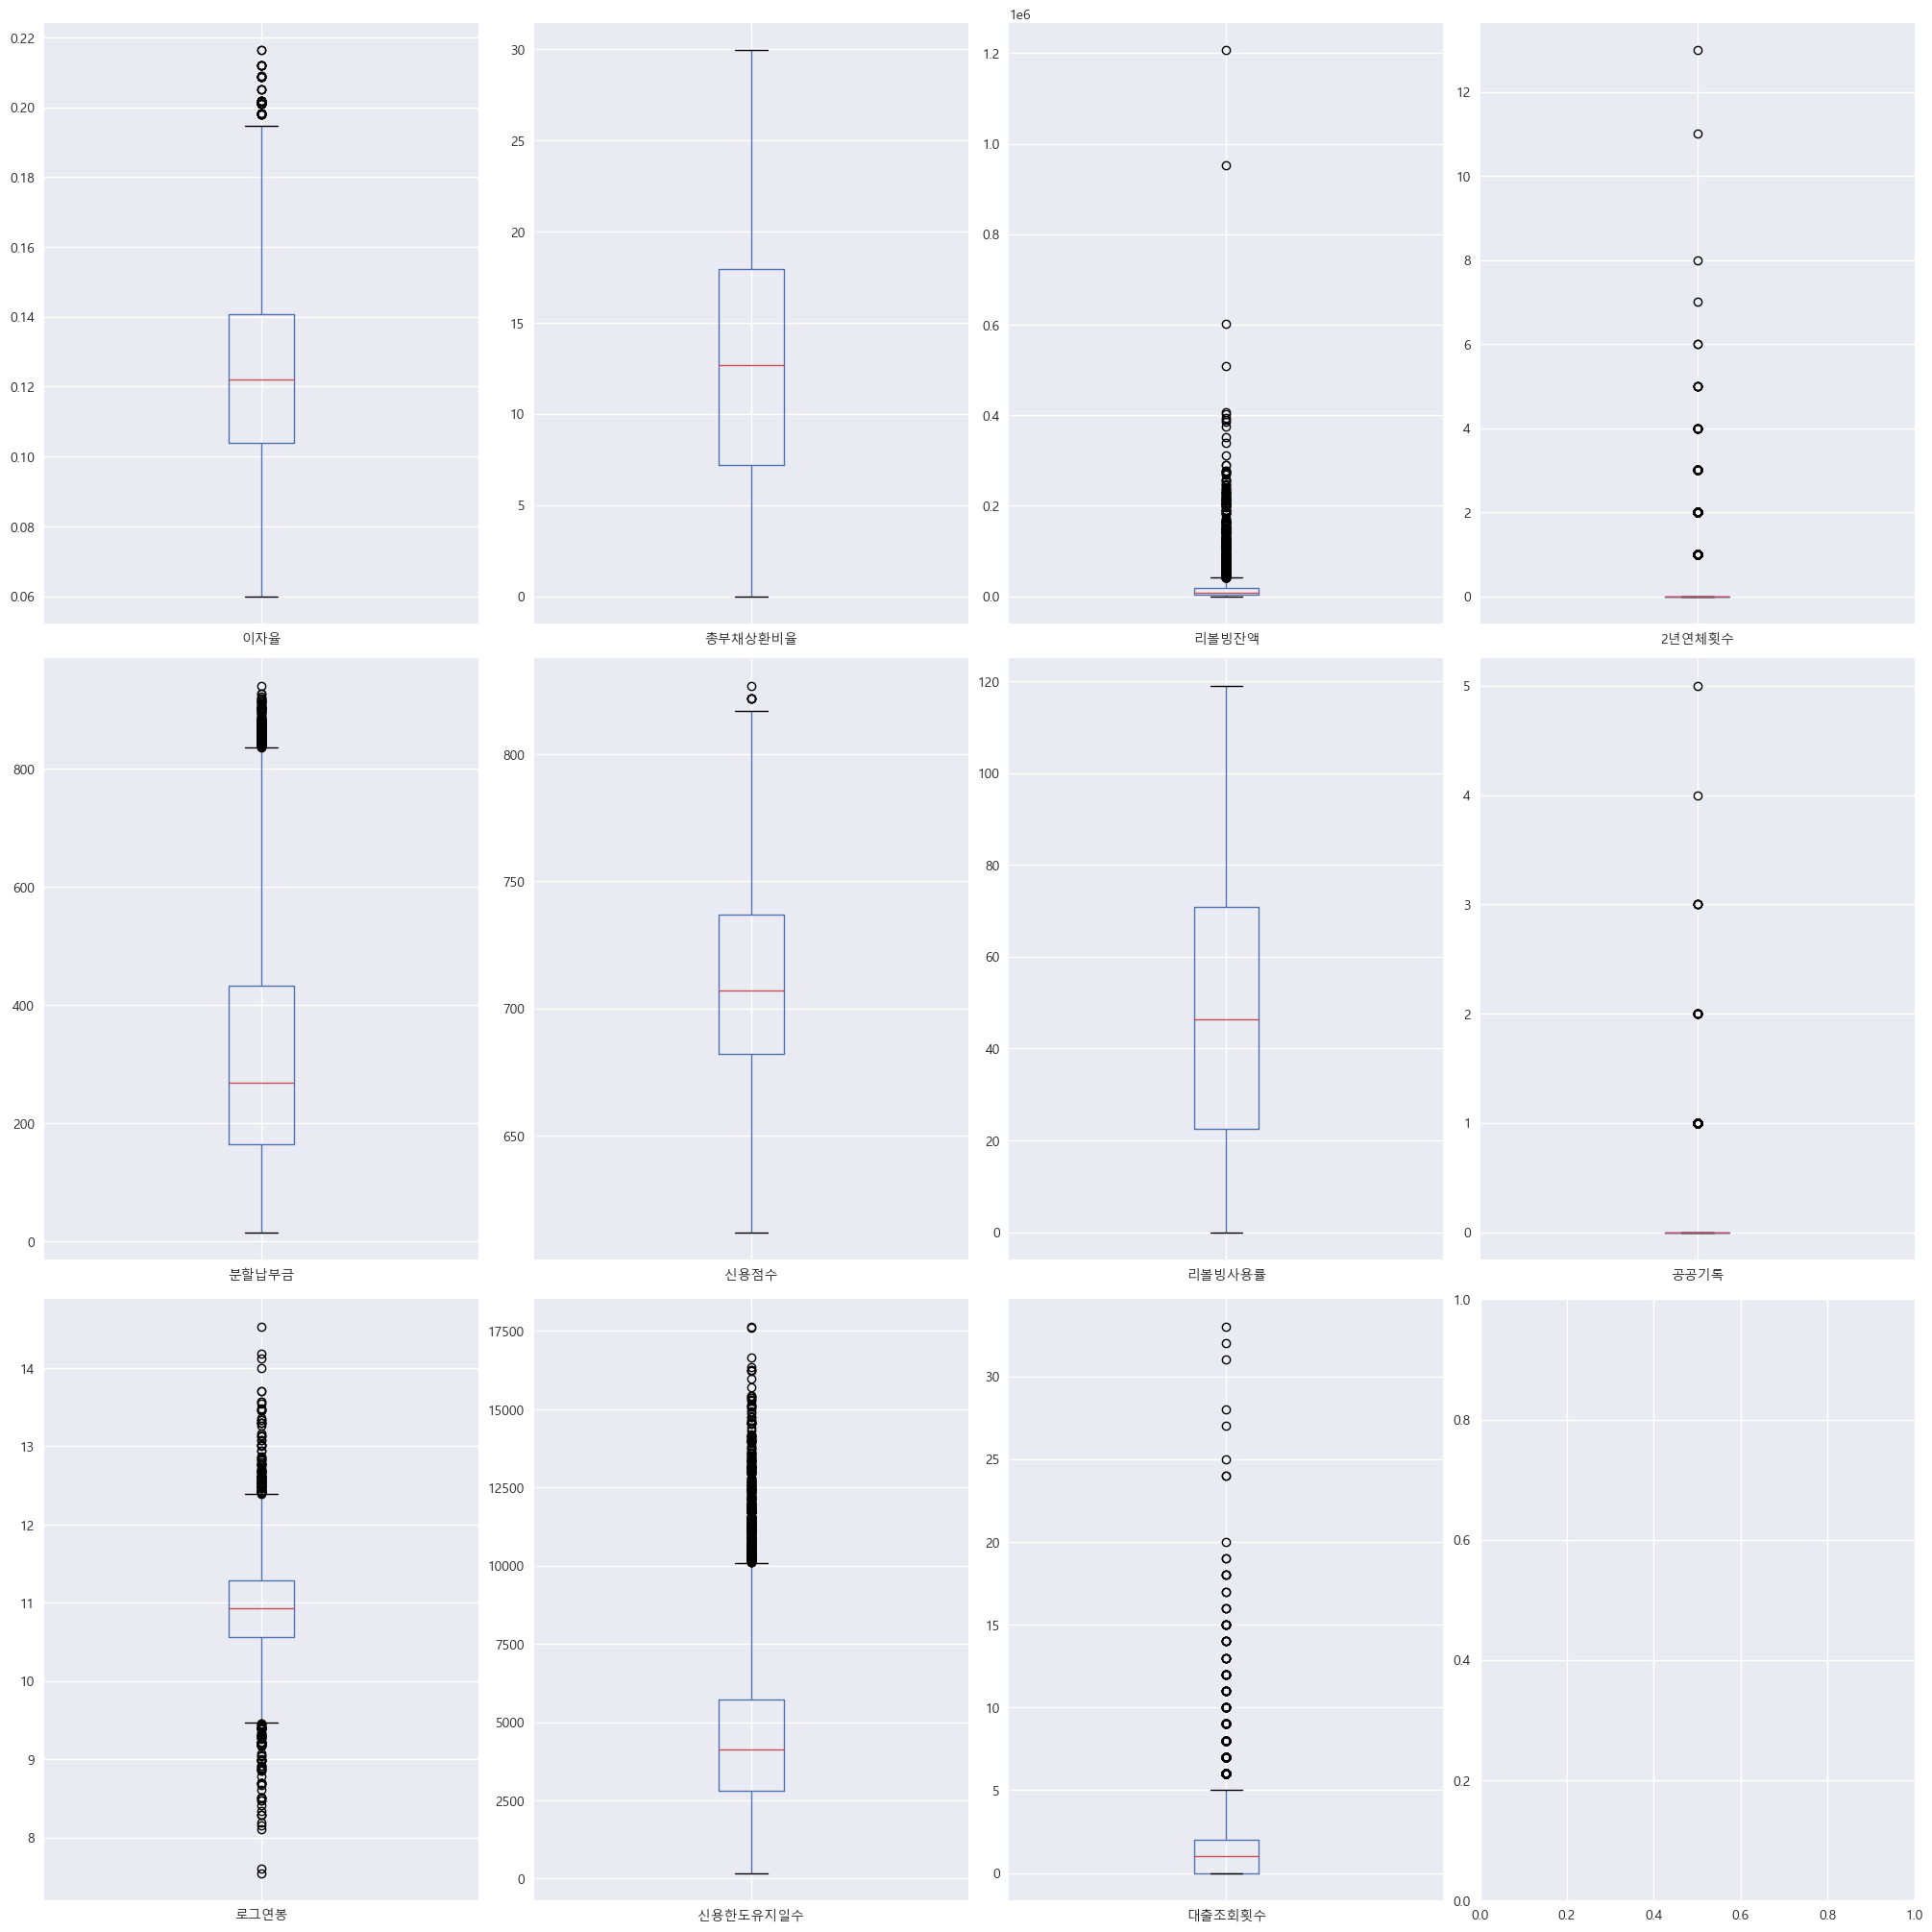

In [10]:
df_box = df_EDA
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'

ncols = 4
nrows = 3

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 20))

for col, ax in zip(df_box.columns, axs.T.ravel()):
    df_box[[col]].boxplot(ax=ax)
    
plt.show()

## Y레이블 생성
---

- 신용점수 740점 이상 : good (0)
- 신용점수 670점 이상 : std (1)
- 신용점수 670점 미만 : poor (2)

In [11]:
# 등급컬럼 생성

df['등급'] = ''            # 새로운 등급 컬럼 생성

for i in range(len(df)):   # 반복문을 통해 등급 컬럼 제작
    if df['신용점수'][i] >= 740:
        df['등급'][i] = 0
    elif (df['신용점수'][i] < 740) & (df['신용점수'][i] >= 670):
        df['등급'][i] = 1
    elif df['신용점수'][i] < 670:
        df['등급'][i] = 2

In [12]:
# 등급 분포 확인 (0 : 23%, 1 : 63%,  2: 14%)
df['등급'].value_counts()

1    6007
0    2230
2    1341
Name: 등급, dtype: int64

In [13]:
# 등급 컬럼을 따로 저장(y레이블)
df_leave = df['등급']

df.drop(columns='등급', axis=1, inplace=True)

In [14]:
# 등급 컬럼을 제작할 때 사용했던 신용점수 컬럼 삭제

df.drop(columns='신용점수', axis=1, inplace=True)

In [15]:
# 목적 컬럼 겟더미화

df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   신용등급                   9578 non-null   int64  
 1   이자율                    9578 non-null   float64
 2   분할납부금                  9578 non-null   float64
 3   로그연봉                   9578 non-null   float64
 4   총부채상환비율                9578 non-null   float64
 5   신용한도유지일수               9578 non-null   float64
 6   리볼빙잔액                  9578 non-null   int64  
 7   리볼빙사용률                 9578 non-null   float64
 8   대출조회횟수                 9578 non-null   int64  
 9   2년연체횟수                 9578 non-null   int64  
 10  공공기록                   9578 non-null   int64  
 11  완전대출여부                 9578 non-null   int64  
 12  목적_credit_card         9578 non-null   uint8  
 13  목적_debt_consolidation  9578 non-null   uint8  
 14  목적_educational         9578 non-null   uint8  
 15  목적_h

In [16]:
# 겟더미까지 완료된 데이터에 등급(y레이블)컬럼 결합
df = pd.concat([df, df_leave], axis=1)

In [19]:
# 로우 데이터 저장
df.to_csv('./datasets/Raw_data.csv', index=0)